# Stock Prediction

Name: **Radhika Garg**

DataSet of Company: Amazon [AMZN](https://query1.finance.yahoo.com/v7/finance/download/AMZN)

Period: 20-08-2018 - 20-08-2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

## 1. Stock Prediction Using LSTM

In [4]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from io import StringIO

In [5]:
start_date = '20-08-2018'
end_date = '20-08-2023'

start_date = datetime.strptime(start_date, '%d-%m-%Y')
end_date = datetime.strptime(end_date, '%d-%m-%Y')
period1 = int(start_date.timestamp())
period2 = int(end_date.timestamp())


In [6]:
company = 'AMZN'
base_url = f'https://query1.finance.yahoo.com/v7/finance/download/{company}'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
}
params = {
    'period1': period1,
    'period2': period2,
    'interval': '1d'
}

In [7]:
res = requests.get(base_url, params=params, headers=headers)
res

<Response [200]>

In [8]:
df = None
if res.status_code == 200:
    soup = BeautifulSoup(res.content, 'html.parser')
    df = pd.read_csv(StringIO(str(soup)))




In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-20,94.528503,94.587502,93.303001,93.835503,93.835503,57240000
1,2018-08-21,94.000000,94.887497,93.720497,94.170998,94.170998,62112000
2,2018-08-22,93.832001,95.290001,93.832001,95.245003,95.245003,61610000
3,2018-08-23,95.358498,95.974998,95.038002,95.144997,95.144997,71260000
4,2018-08-24,95.525497,95.800499,95.126999,95.269501,95.269501,56018000


In [10]:
df['Date'] = pd.to_datetime(df.Date)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-20,94.528503,94.587502,93.303001,93.835503,93.835503,57240000
1,2018-08-21,94.000000,94.887497,93.720497,94.170998,94.170998,62112000
2,2018-08-22,93.832001,95.290001,93.832001,95.245003,95.245003,61610000
3,2018-08-23,95.358498,95.974998,95.038002,95.144997,95.144997,71260000
4,2018-08-24,95.525497,95.800499,95.126999,95.269501,95.269501,56018000
...,...,...,...,...,...,...,...
1253,2023-08-14,138.300003,140.589996,137.750000,140.570007,140.570007,47148700
1254,2023-08-15,140.050003,141.279999,137.229996,137.669998,137.669998,42781500
1255,2023-08-16,137.190002,137.270004,135.009995,135.070007,135.070007,41675900
1256,2023-08-17,135.460007,136.089996,133.529999,133.979996,133.979996,48354100


In [13]:
fig = go.Figure()

# fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], name='High',
#                          line={'color':'green', 'dash':'dash'}))
# fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], name='Open',
#                          line={'color':'orange'}))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close',
                         line={'color':'royalblue'}))
# fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], name='Low',
#                          line={'color':'firebrick', 'dash':'dot'}))

fig.show()

In [14]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=df['Date'],
                             high=df['High'],
                             open=df['Open'],
                             low=df['Low'],
                             close=df['Close']))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
df['MA7'] = df['Close'].rolling(7, min_periods=0).mean()
df['EMA'] = df['Close'].ewm(span=7).mean()

In [16]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=df['Date'],
                             high=df['High'],
                             open=df['Open'],
                             low=df['Low'],
                             close=df['Close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=df['Date'],
                         y=df['MA7'], name='MA7', line={'color':'royalblue'}))

fig.add_trace(go.Scatter(x=df['Date'],
                         y=df['EMA'], name='EMA', line={'color': 'orange'}))

fig.update_layout(xaxis_rangeslider_visible=False, width=1200, height=800)
fig.show()

In [17]:
df['Daily_Returns'] = df['Close'].pct_change()

In [18]:
variation = df.Daily_Returns.std()
variation

0.02312077009203958

In [19]:
px.histogram(df, x='Daily_Returns', )

In [20]:
df.Daily_Returns.rolling(window=7, min_periods=0).std()

0            NaN
1            NaN
2       0.005536
3       0.006296
4       0.005404
          ...   
1253    0.033623
1254    0.015882
1255    0.013933
1256    0.013413
1257    0.012843
Name: Daily_Returns, Length: 1258, dtype: float64

In [21]:
delta = df.Close.diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.ewm(span=14).mean()
avg_loss = loss.ewm(span=14).mean()

rs = avg_gain / avg_loss

In [22]:
rsi = 100 - (100 / (1 + rs))

rsi_df = df.copy()
rsi_df['RSI'] = rsi
rsi_df = rsi_df.dropna()[3:]
# rsi_df

In [23]:
fig = make_subplots(rows=3, cols=1, subplot_titles=[f'{company} CLOSE PRICE', f'{company} RELATIVE STRENGTH INDEX'])

fig.append_trace(go.Scatter(x=rsi_df['Date'], y=rsi_df['Close'], name='Close'), row=1, col=1)

fig.append_trace(go.Scatter(x=rsi_df['Date'], y=rsi_df['RSI'], line={'color': 'orange'}, name='RSI'), row=2, col=1)
fig.add_hline(y=70, line_color='gray', line_dash='dash', row=2, col=1)
fig.add_hline(y=30, line_color='gray', line_dash='dash', row=2, col=1)


fig.update_layout(
    width=1200,
    height=800,
    yaxis=dict(range=[0, 100])
)
fig.show()

In [24]:
# plt.figure(figsize=(8, 8))
# sns.heatmap(rsi_df.corr(), annot=True)

In [25]:
candlestick = go.Candlestick(x=df['Date'],
                             high=df['High'],
                             open=df['Open'],
                             low=df['Low'],
                             close=df['Close'],
                             name='Candlestick')

volume_bar = go.Bar(x=df['Date'],
                    y=df['Volume'],
                    yaxis='y2',
                    name='Volume')

fig = go.Figure(data=[candlestick, volume_bar])

fig.update_layout(
    title='Candlestick chart with Volume',
    yaxis_title='Stock Price',
    yaxis2={'title': 'Volume', 'overlaying':'y', 'side':'right'}
)
fig.show()

### Preprocess the Data

### Splitting the data

In [26]:
df['5D-MA'] = df['Close'].rolling(window=5).mean()

In [27]:
df['RSI'] = rsi

In [28]:
df['Price_Change'] = df['Close'].diff()

In [29]:
df['Last_Close'] = df['Close'].shift(1)
df['Last_Volume'] = df['Volume'].shift(1)

In [30]:
df.dropna(inplace=True)

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA7,EMA,Daily_Returns,5D-MA,RSI,Price_Change,Last_Close,Last_Volume
4,2018-08-24,95.525497,95.800499,95.126999,95.269501,95.269501,56018000,94.733200,94.933746,0.001309,94.733200,92.989232,0.124504,95.144997,71260000.0
5,2018-08-27,95.750000,96.385002,95.463997,96.384003,96.384003,71380000,95.008334,95.374810,0.011698,95.242900,96.563683,1.114502,95.269501,56018000.0
6,2018-08-28,96.886497,97.088997,96.441002,96.640999,96.640999,62014000,95.241572,95.740120,0.002666,95.736901,96.974156,0.256996,96.384003,71380000.0
7,2018-08-29,97.672501,99.934502,97.446999,99.904999,99.904999,130636000,96.108643,96.897176,0.033774,96.668900,98.899893,3.264000,96.640999,62014000.0
8,2018-08-30,99.871002,101.278503,99.345001,100.119003,100.119003,145546000,96.958358,97.768020,0.002142,97.663701,98.950427,0.214004,99.904999,130636000.0


<Axes: >

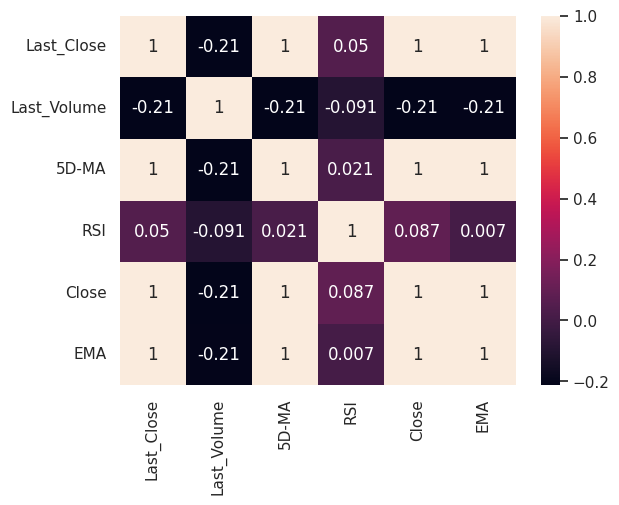

In [32]:
sns.heatmap(df[['Last_Close', 'Last_Volume', '5D-MA', 'RSI', 'Close', 'EMA']].corr(), annot=True)

In [33]:
X = df[['Last_Close', 'Last_Volume', '5D-MA', 'RSI']]
y = df['Close']

In [34]:
train_size = int(0.8 * X.shape[0])

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Some Import

**Decision Trees, RandomForest, Gradient Boosting and SVM**

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [36]:
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=20)
rf_reg.fit(X_train, y_train)


print(f"Mean Absolute Error on Training set: {mean_absolute_error(y_train, rf_reg.predict(X_train))}")
print(f"Mean Absolute Error on Test set: {mean_absolute_error(y_test, rf_reg.predict(X_test))}")
print()
print(f"Mean Squared Error on Training set: {mean_squared_error(y_train, rf_reg.predict(X_train))}")
print(f"Mean Squared Error on Test set: {mean_squared_error(y_test, rf_reg.predict(X_test))}")

Mean Absolute Error on Training set: 1.179881932512136
Mean Absolute Error on Test set: 2.2690370692178967

Mean Squared Error on Training set: 3.1176811072971935
Mean Squared Error on Test set: 8.807315619464507


In [37]:
gb_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor())
])
gb_reg.fit(X_train, y_train)


print(f"Mean Absolute Error on Training set: {mean_absolute_error(y_train, gb_reg.predict(X_train))}")
print(f"Mean Absolute Error on Test set: {mean_absolute_error(y_test, gb_reg.predict(X_test))}")
print()
print(f"Mean Squared Error on Training set: {mean_squared_error(y_train, gb_reg.predict(X_train))}")
print(f"Mean Squared Error on Test set: {mean_squared_error(y_test, gb_reg.predict(X_test))}")

Mean Absolute Error on Training set: 1.0725109352616193
Mean Absolute Error on Test set: 1.8162247190128886

Mean Squared Error on Training set: 2.0943312641514855
Mean Squared Error on Test set: 5.6186596614955375


In [38]:
svr_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='linear', C=10))
])
svr_reg.fit(X_train, y_train)


print(f"Mean Absolute Error on Training set: {mean_absolute_error(y_train, svr_reg.predict(X_train))}")
print(f"Mean Absolute Error on Test set: {mean_absolute_error(y_test, svr_reg.predict(X_test))}")
print()
print(f"Mean Squared Error on Training set: {mean_squared_error(y_train, svr_reg.predict(X_train))}")
print(f"Mean Squared Error on Test set: {mean_squared_error(y_test, svr_reg.predict(X_test))}")

Mean Absolute Error on Training set: 1.5706623488096503
Mean Absolute Error on Test set: 1.4948292297359627

Mean Squared Error on Training set: 4.793581994237122
Mean Squared Error on Test set: 3.950398868100587


## Neural Networks

### LSTM

#### Data Preprocessing

In [39]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [40]:
prices =  df.Close.values
minmax = MinMaxScaler()
prices_scaled = minmax.fit_transform(prices.reshape(-1, 1))

In [41]:
prices_scaled

array([[0.23515888],
       [0.24449522],
       [0.24664811],
       ...,
       [0.56857325],
       [0.55944208],
       [0.55307549]])

In [42]:
prev_days = 30
feats, target = [], []

for i in range(prev_days, len(prices_scaled)):
    feats.append(prices_scaled[i-prev_days:i])
    target.append(prices_scaled[i])

feats = np.array(feats)
target = np.array(target)

In [43]:
feats.shape, target.shape

((1224, 30, 1), (1224, 1))

In [44]:
train_size=int(0.8 * feats.shape[0])

train_feats, test_feats = feats[:train_size], feats[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

In [45]:
train_feats.shape, test_feats.shape

((979, 30, 1), (245, 30, 1))

#### Model Building

In [46]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(train_feats.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


#### Model Training

In [48]:
# Training Model
lstm_model.fit(train_feats, train_target, epochs=100, batch_size=32, validation_data=(test_feats, test_target), verbose=1)

Epoch 1/100
31/31 [==============================] - 12s 94ms/step - loss: 0.0622 - val_loss: 0.0100
Epoch 2/100
31/31 [==============================] - 2s 52ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 3/100
31/31 [==============================] - 2s 54ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 4/100
31/31 [==============================] - 2s 53ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 5/100
31/31 [==============================] - 2s 53ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 6/100
31/31 [==============================] - 3s 89ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 7/100
31/31 [==============================] - 2s 55ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 8/100
31/31 [==============================] - 2s 51ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 9/100
31/31 [==============================] - 2s 52ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 10/100
31/31 [==============================] - 2s 52ms/step - loss: 0.0031 - val_loss: 0.002

**Predictions on test data**

In [49]:
train_target_pred = lstm_model.predict(train_feats)
test_target_pred = lstm_model.predict(test_feats)

8/8 [==============================] - 0s 22ms/step


In [50]:
train_target_pred_res = minmax.inverse_transform(train_target_pred)
train_target_res = minmax.inverse_transform(train_target)
test_target_pred_res = minmax.inverse_transform(test_target_pred)
test_target_res = minmax.inverse_transform(test_target)

In [51]:
mean_squared_error(train_target_res, train_target_pred_res)

8.504734090419868

In [52]:
mean_squared_error(test_target_res, test_target_pred_res)

8.089021244179408

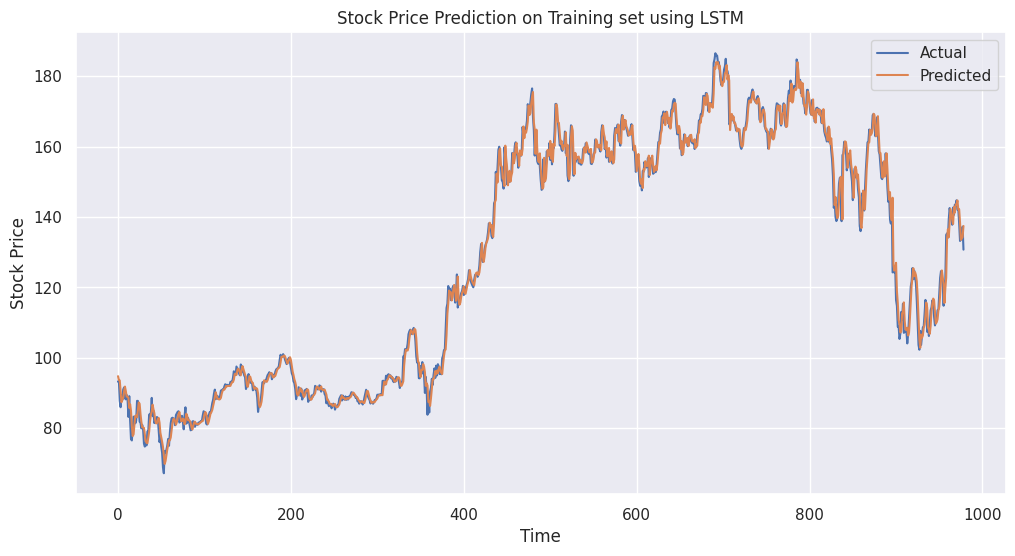

In [53]:
# Train Prediction Plot
plt.figure(figsize=(12, 6))
plt.plot(train_target_res[:, 0], label='Actual')
plt.plot(train_target_pred_res[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction on Training set using LSTM')
plt.legend()
plt.show()

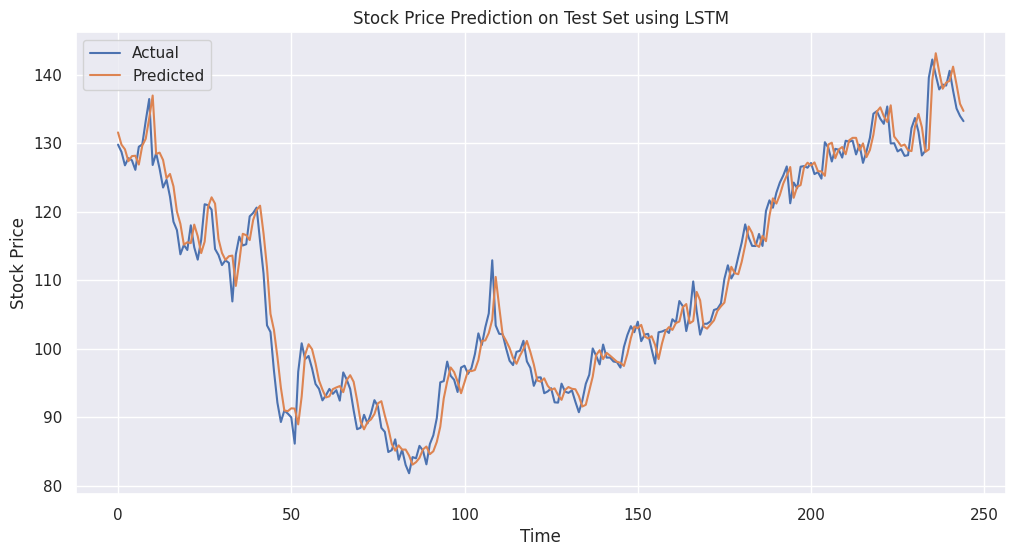

In [54]:
# Test Prediction Plot
plt.figure(figsize=(12, 6))
plt.plot(test_target_res[:, 0], label='Actual')
plt.plot(test_target_pred_res[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction on Test Set using LSTM')
plt.legend()
plt.show()